In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/Users/MikeMargolis/Downloads/train.csv')

In [3]:
#data.head()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### observing the data and first thoughts
- label and pixel values 
- first column is Y value next 784 are pixel values for each row, Good
- if rows are 784 from a mtrix, it must be a 28 x 28 matrix, sqrt(784) = 28
- need the dimension of the data m (rows) and n (columns)
- probably have to make a numpy array to use my equations
- split into train and test
- have to transpose some matrixies to use matrix algebra
- Sigmoid Vs ReLU, Sigmoid is better but harder to undo, ReLU works and I can get the derivative easier it when I get to backprop


In [5]:
data = np.array(data)

In [6]:
m ,n = data.shape

In [7]:
np.random.shuffle(data)

In [8]:
data_test = data[0:2000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[2000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [9]:
Y_train
#correct Y values that we will be predicting

array([0, 2, 2, ..., 0, 0, 2])

In [10]:
Y_test

array([3, 0, 8, ..., 0, 4, 1])

In [11]:
X_train[:,0].shape
#784 pixels, Good

(784,)

In [12]:
X_test[:,0].shape

(784,)

## Start the math and define parameters

In [13]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(H):
    return np.maximum(H, 0)

def softmax(H):
    A = np.exp(H) / sum(np.exp(H))
    return A

### Forward Propigation

In [14]:
def forward_prop(W1, b1, W2, b2, X):
    H1 = W1.dot(X) + b1
    A1 = ReLU(H1)
    H2 = W2.dot(A1) + b2
    A2 = softmax(H2)
    return H1, A1, H2, A2

### Set up Backward Propigation

In [15]:
def ReLU_deriv(H):
    return H > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

- need to fix Y to indicate values not be values called "one hot"
- for each row fnd the column with the specified Y values and set = 1 if they match
- then we have to flip the matrix we want the columns to be the example not each row

### Backward Propigation and Updating

In [16]:
def backward_prop(H1, A1, H2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dH2 = A2 - one_hot_Y
    dW2 = 1 / m * dH2.dot(A1.T)
    db2 = 1 / m * np.sum(dH2)
    dH1 = W2.T.dot(dH2) * ReLU_deriv(H1)
    dW1 = 1 / m * dH1.dot(X.T)
    db1 = 1 / m * np.sum(dH1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

### Setting up predictions and accuracy tests

In [17]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

### Gradient Descent and setting up function for running tests

In [29]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        H1, A1, H2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(H1, A1, H2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 200 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
        
        

### Running the tests on training dataset with 500 iterations and a learning rate of 10%

In [37]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.30, 1000)

Iteration:  0
[8 3 3 ... 3 3 3] [0 2 2 ... 0 0 2]
0.078275
Iteration:  200
[0 2 2 ... 0 0 2] [0 2 2 ... 0 0 2]
0.8472
Iteration:  400
[0 2 2 ... 0 0 2] [0 2 2 ... 0 0 2]
0.881475
Iteration:  600
[0 2 2 ... 0 0 2] [0 2 2 ... 0 0 2]
0.8938
Iteration:  800
[0 2 2 ... 0 0 2] [0 2 2 ... 0 0 2]
0.9025


### Traning Data results and obeservations
- First random seed we get an accuracy of 84.5% after 500 iterations and learning rate of 10%
- Couple more random seeds with 1000 iterations best accuracy I got was 89%
- Random seed with 1000 iterations and a learning rate of 30% the best accuracy I got in sample was 90.25%
- pretty good 
- definetly beats the benchmark of 10% which is guessing a random digit everytime
- Most comman mistakes are (9 and 7) (3, 8, and 5) (4 and 9) 

### Setting up display diagram plus prediction Vs actual display
- Have to set up make_predictions command as a function of previous get_prediction command
- Here we can type in a specific iteration and check our work
- As well as display the actual digit to see how the AI came to its conclusion
- have to reshape the row to a 28 x 28 matrix and frame to not lose scale

In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


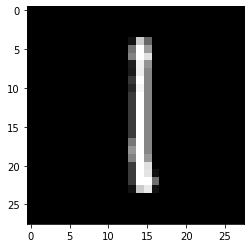

In [36]:
test_prediction(169, W1, b1, W2, b2)

### Running equation on test dataset
- 500 iterations with a learning rate of 10%

In [33]:
W1, b1, W2, b2 = gradient_descent(X_test, Y_test, 0.10, 500)

Iteration:  0
[2 2 7 ... 2 2 7] [3 0 8 ... 0 4 1]
0.0805
Iteration:  200
[5 4 8 ... 5 3 1] [3 0 8 ... 0 4 1]
0.221
Iteration:  400
[5 4 8 ... 3 7 1] [3 0 8 ... 0 4 1]
0.2795
